In [0]:
 # -*- coding: utf-8 -*-
"""SimpleXml.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1ZLBNKY4Cile4EZslasgQ0z9hMf4rZJBv
"""

import tensorflow as tf
from tensorflow import keras

import numpy as np # for multidimensional arrays

In [0]:
# Constants
INPUT_WIDTH = 24

# Word index
word_index = {}
word_index["<PAD>"] = 0
word_index["<VALUE UP>"] = 1
word_index["<VALUE DOWN>"] = 2
word_index["<STRING CHANGE>"] = 3
word_index["<CHILD CHANGE>"] = 4
word_index["<NUMBER CHANGE>"] = 5
word_index["<UNKNOWN>"] = 6
word_index["."] = 7
word_index["entry"] = 8
word_index["document"] = 9
word_index["validationxml"] = 10
word_index["browserxml"] = 11
word_index["arrangement"] = 12
word_index["base"] = 13
word_index["text()"] = 14
word_index["dlitem"] = 15
word_index["@label"] = 16
word_index["node"] = 17
word_index["member"] = 18
word_index["@type"] = 19
word_index["displayxml"] = 20
word_index["sheets"] = 21
word_index["sheet"] = 22
word_index["root"] = 23
word_index["@Y"] = 24
word_index["attr"] = 25
word_index["@rtti"] = 26
word_index["textstylemanager"] = 27
word_index["textstyle"] = 28
word_index["Entry"] = 29
word_index["@chronoid"] = 30
word_index["@X"] = 31
word_index["renderstylexml"] = 32
word_index["bodychecksum"] = 33
word_index["bodychecksumxml"] = 34
word_index["executablexml"] = 35
word_index["BrowInfo"] = 36
word_index["transform"] = 37
word_index["primattrstack"] = 38
word_index["primattr"] = 39
word_index["renderstyletable"] = 40
word_index["style"] = 41
word_index["attributesxml"] = 42
word_index["attributesets"] = 43
word_index["attributeset"] = 44
word_index["attribute"] = 45
word_index["occurrence"] = 46
word_index["@style"] = 47
word_index["feaxml"] = 48
word_index["fearesults"] = 49
word_index["simulationresults"] = 50
word_index["resultsummary"] = 51
word_index["RelativeReactionForces"] = 52
word_index["constraintReactionForce"] = 53
word_index["@maxComponent"] = 54
word_index["propertiesxml"] = 55
word_index["propertysets"] = 56
word_index["propertyset"] = 57
word_index["property"] = 58
word_index["@value"] = 59
word_index["EndTreatments"] = 60
word_index["EndTreatment"] = 61
word_index["Lengthen"] = 62
word_index["workgeometryxml"] = 63
word_index["workplanes"] = 64
word_index["@blue"] = 65
word_index["@green"] = 66
word_index["@red"] = 67
word_index["@ambient"] = 68
word_index["@diffuse"] = 69
word_index["@internalname"] = 70
word_index["testingaddin"] = 71
word_index["apixml"] = 72
word_index["assemblychecksumxml"] = 73
word_index["component"] = 74
word_index["bodyoverrides"] = 75
word_index["bodyoverride"] = 76
word_index["@count"] = 77
word_index["FDesign"] = 78
word_index["Object"] = 79
word_index["Calc"] = 80
word_index["thl"] = 81
word_index["@Val"] = 82
word_index["dcxml"] = 83
word_index["features"] = 84
word_index["feature"] = 85
word_index["@health"] = 86
word_index["@Z"] = 87

# Train data
train_data_raw = []; train_labels = []; train_ids = []
train_data_raw.append([4, 1, 7, 10, 71, 72]);                                                                       train_labels.append(0); train_ids.append("colorschemescoll_001#0")
train_data_raw.append([4, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8]);                                                        train_labels.append(1); train_ids.append("copy_paste_part#1")
train_data_raw.append([5, 2, 7, 10, 9, 42, 43, 44, 45, 78, 79, 80, 81, 82]);                                        train_labels.append(0); train_ids.append("dac_chains_calc_10201020#0")
train_data_raw.append([3, 1, 7, 10, 9, 73, 74, 75, 76, 33, 14]);                                                    train_labels.append(0); train_ids.append("feat_807811#0")
train_data_raw.append([3, 1, 7, 10, 9, 83, 84, 85, 86]);                                                            train_labels.append(0); train_ids.append("smmsb_createpunch#0")
train_data_raw.append([5, 1, 7, 10, 9, 20, 21, 22, 9, 23, 17, 13, 13, 17, 13, 15, 15, 15, 18, 24]);                 train_labels.append(0); train_ids.append("tc5356#5")
train_data_raw.append([5, 2, 7, 10, 9, 20, 21, 22, 9, 23, 17, 13, 13, 13, 25, 25, 27, 28, 18, 18, 14]);             train_labels.append(0); train_ids.append("idw_etsy_d1207#0")
train_data_raw.append([5, 1, 7, 10, 9, 20, 21, 22, 9, 23, 17, 13, 15, 13, 37, 38, 39, 18, 65]);                     train_labels.append(0); train_ids.append("dm_at_appendfilenameinviewblockname_0004#0")
train_data_raw.append([5, 2, 7, 10, 9, 20, 21, 22, 9, 23, 17, 13, 13, 17, 13, 13, 15, 15, 15, 15, 15, 15, 18, 87]); train_labels.append(0); train_ids.append("dm_migr_r11_coolingtower#0")
train_data_raw.append([5, 1, 7, 10, 9, 20, 21, 22, 9, 23, 17, 13, 13, 17, 13, 15, 15, 18, 31]);                     train_labels.append(0); train_ids.append("592453#0")
train_data_raw.append([5, 2, 7, 10, 9, 20, 21, 22, 9, 23, 17, 13, 15, 13, 37, 38, 39, 18, 66]);                     train_labels.append(0); train_ids.append("dm_at_appendfilenameinviewblockname_0004#1")
train_data_raw.append([5, 2, 7, 10, 9, 20, 21, 22, 9, 23, 17, 13, 15, 13, 37, 38, 39, 18, 67]);                     train_labels.append(0); train_ids.append("dm_at_appendfilenameinviewblockname_0004#2")
train_data_raw.append([5, 1, 7, 10, 9, 42, 43, 44, 45, 60, 61, 62, 14]);                                            train_labels.append(0); train_ids.append("curvedframe_trimtoframe_spline#0")
train_data_raw.append([3, 1, 7, 10, 9, 34, 33, 14]);                                                                train_labels.append(0); train_ids.append("bug116303#0")
train_data_raw.append([3, 1, 7, 10, 9, 48, 49, 50, 51, 52, 53, 54]);                                                train_labels.append(0); train_ids.append("cylinder-30x1000x1500n#0")
train_data_raw.append([5, 2, 7, 10, 9, 20, 21, 22, 9, 23, 17, 13, 13, 17, 13, 15, 15, 18, 24]);                     train_labels.append(0); train_ids.append("907031#1")
train_data_raw.append([3, 1, 7, 10, 9, 55, 56, 57, 58, 59]);                                                        train_labels.append(0); train_ids.append("curvedframe_trimtoframe_arc#0")
train_data_raw.append([3, 1, 7, 10, 9, 32, 46, 47]);                                                                train_labels.append(0); train_ids.append("windshield wiper#6")
train_data_raw.append([4, 1, 7, 10, 9, 63, 64]);                                                                    train_labels.append(0); train_ids.append("parker union tee 164ca-264ca 164ca-2#1")
train_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 16]);                                                          train_labels.append(1); train_ids.append("break link_nx_part2#3")
train_data_raw.append([4, 1, 7, 10, 35, 36, 29, 29, 29, 29, 29]);                                                   train_labels.append(0); train_ids.append("md_mbs_c1213#3")
train_data_raw.append([4, 1, 7, 10, 9, 20, 21, 22, 9, 23, 17, 13, 13, 17, 13, 13, 15, 15, 15, 15, 15]);             train_labels.append(0); train_ids.append("idw_replacemodelreference_c1102#0")
train_data_raw.append([4, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8]);                                                     train_labels.append(1); train_ids.append("copy_paste_part#3")
train_data_raw.append([4, 2, 7, 10, 9, 11, 12, 8, 8]);                                                              train_labels.append(1); train_ids.append("break link_nx_part2#5")
train_data_raw.append([3, 2, 7, 10, 9, 32, 40, 41, 68]);                                                            train_labels.append(0); train_ids.append("windshield wiper#0")
train_data_raw.append([3, 2, 7, 10, 9, 32, 40, 41, 69]);                                                            train_labels.append(0); train_ids.append("windshield wiper#1")
train_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 16]);                                                    train_labels.append(1); train_ids.append("copy_paste_part#0")
train_data_raw.append([5, 1, 7, 10, 9, 20, 21, 22, 9, 23, 17, 13, 13, 17, 13, 15, 15, 18, 24]);                     train_labels.append(0); train_ids.append("tc5356#0")
train_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 8, 8, 16]);                                                       train_labels.append(1); train_ids.append("break link_nx_part2#0")
train_data_raw.append([3, 1, 7, 10, 9, 32, 40, 41, 70]);                                                            train_labels.append(0); train_ids.append("windshield wiper#2")
train_data_raw.append([5, 1, 7, 10, 9, 63, 64, 77]);                                                                train_labels.append(0); train_ids.append("parker union tee 164ca-264ca 164ca-2#0")
train_data_raw.append([5, 2, 7, 10, 9, 11, 12, 8, 8, 30]);                                                          train_labels.append(2); train_ids.append("break link_nx_part2#2")
train_data_raw.append([5, 2, 7, 10, 9, 20, 21, 22, 9, 23, 17, 13, 13, 17, 13, 15, 15, 18, 31]);                     train_labels.append(0); train_ids.append("907031#10")
train_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 16]);                                                 train_labels.append(1); train_ids.append("copy_paste_part#2")
train_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 26]);                                                          train_labels.append(1); train_ids.append("break link_nx_part2#4")
train_data_raw.append([4, 1, 7, 10, 35, 36, 29, 29, 29, 29, 29, 29, 29]);                                           train_labels.append(0); train_ids.append("md_mbs_c1213#0")
train_data_raw.append([4, 1, 7, 10, 9, 11, 12, 8, 8]);                                                              train_labels.append(1); train_ids.append("5456_moveeop#0")

# Validation data
validation_data_raw = []; validation_labels = []; validation_ids = []
validation_data_raw.append([4, 1, 7, 10, 9, 11, 12, 8, 8]);                                                              validation_labels.append(1); validation_ids.append("5456_moveeop#0")
validation_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 8, 8, 16]);                                                       validation_labels.append(1); validation_ids.append("break link_nx_part2#0")
validation_data_raw.append([5, 2, 7, 10, 9, 11, 12, 8, 8, 30]);                                                          validation_labels.append(2); validation_ids.append("break link_nx_part2#2")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 16]);                                                          validation_labels.append(1); validation_ids.append("break link_nx_part2#3")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 26]);                                                          validation_labels.append(1); validation_ids.append("break link_nx_part2#4")
validation_data_raw.append([4, 2, 7, 10, 9, 11, 12, 8, 8]);                                                              validation_labels.append(1); validation_ids.append("break link_nx_part2#5")
validation_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 16]);                                                    validation_labels.append(1); validation_ids.append("copy_paste_part#0")
validation_data_raw.append([4, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8]);                                                        validation_labels.append(1); validation_ids.append("copy_paste_part#1")
validation_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 16]);                                                 validation_labels.append(1); validation_ids.append("copy_paste_part#2")
validation_data_raw.append([4, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8]);                                                     validation_labels.append(1); validation_ids.append("copy_paste_part#3")
validation_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 16]);                                              validation_labels.append(1); validation_ids.append("copy_paste_part#4")
validation_data_raw.append([4, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8]);                                                  validation_labels.append(1); validation_ids.append("copy_paste_part#5")
validation_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 8, 16]);                                           validation_labels.append(1); validation_ids.append("copy_paste_part#6")
validation_data_raw.append([4, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 8]);                                               validation_labels.append(1); validation_ids.append("copy_paste_part#7")
validation_data_raw.append([4, 1, 7, 10, 9, 11, 12, 8]);                                                                 validation_labels.append(1); validation_ids.append("bug108192#0")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 8, 16]);                                                       validation_labels.append(1); validation_ids.append("bug116272#1")
validation_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 8, 16]);                                                          validation_labels.append(1); validation_ids.append("bug37980#0")
validation_data_raw.append([5, 1, 7, 10, 9, 11, 12, 8, 8, 8, 30]);                                                       validation_labels.append(2); validation_ids.append("futureanycad_update_catia_assembly4#6")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 16]);                                                 validation_labels.append(1); validation_ids.append("non-associative_import_catia_assm2#2")
validation_data_raw.append([4, 1, 7, 10, 9, 11, 12, 8, 8, 8]);                                                           validation_labels.append(1); validation_ids.append("non-associative_import_catia_assm2#3")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 16]);                                                    validation_labels.append(1); validation_ids.append("non-associative_import_catia_assm2#26")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 16]);                                              validation_labels.append(1); validation_ids.append("localsave_swx_1#2")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 8, 16]);                                           validation_labels.append(1); validation_ids.append("localsave_swx_1#3")
validation_data_raw.append([4, 2, 7, 10, 9, 11, 12, 8]);                                                                 validation_labels.append(1); validation_ids.append("selective_catia_part12#0")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 19]);                                                             validation_labels.append(1); validation_ids.append("createtextboxconstraintproxy_001#0")
validation_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 14]);                                                             validation_labels.append(1); validation_ids.append("createtextboxconstraintproxy_001#1")
validation_data_raw.append([4, 2, 7, 10, 9, 11, 12, 8, 14]);                                                             validation_labels.append(1); validation_ids.append("createtextboxconstraintproxy_001#2")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 8, 26]);                                                       validation_labels.append(1); validation_ids.append("additionaldisplaysettings_ipn#1")
validation_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 8, 8, 26]);                                                       validation_labels.append(1); validation_ids.append("additionaldisplaysettings_ipn#4")
validation_data_raw.append([4, 2, 7, 10, 9, 11, 12, 8, 8, 8]);                                                           validation_labels.append(1); validation_ids.append("additionaldisplaysettings_ipn#5")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 14]);                                                             validation_labels.append(1); validation_ids.append("moveoccurrence_01#1")
validation_data_raw.append([4, 1, 7, 10, 9, 11, 12, 8, 14]);                                                             validation_labels.append(1); validation_ids.append("part_ang_set paramter sensor then create#2")
validation_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 26]);                                                             validation_labels.append(1); validation_ids.append("sheet_dia_set parameter then create#0")
validation_data_raw.append([4, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8]);                                                        validation_labels.append(1); validation_ids.append("constraints_1215425#4")
validation_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 16]);                                                             validation_labels.append(1); validation_ids.append("iam_fllt_l9105#0")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 16]);                                                             validation_labels.append(1); validation_ids.append("translator_aliasimportoption_003#0")
validation_data_raw.append([5, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 30]);                                                    validation_labels.append(2); validation_ids.append("translator_stepplacecomponentimportoption_004#1")
validation_data_raw.append([5, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 30]);                                                 validation_labels.append(2); validation_ids.append("translator_stepplacecomponentimportoption_004#3")
validation_data_raw.append([5, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 30]);                                                    validation_labels.append(2); validation_ids.append("derv_1509172#1")
validation_data_raw.append([5, 1, 7, 10, 9, 11, 12, 8, 8, 30]);                                                          validation_labels.append(2); validation_ids.append("derv_1509172#4")
validation_data_raw.append([5, 2, 7, 10, 9, 11, 12, 8, 8, 8, 30]);                                                       validation_labels.append(2); validation_ids.append("dprt_rmm_11#0")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 8, 8, 16]);                                        validation_labels.append(1); validation_ids.append("am_migr_r10_arm system#13")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 26]);                                                    validation_labels.append(1); validation_ids.append("am_migr_r10_arm system#20")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 26]);                                                 validation_labels.append(1); validation_ids.append("am_migr_r10_arm system#79")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 26]);                                              validation_labels.append(1); validation_ids.append("am_migr_r10_arm system#98")
validation_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 8, 8, 16]);                                        validation_labels.append(1); validation_ids.append("sm brace- small#8")
validation_data_raw.append([3, 1, 7, 10, 9, 48, 49, 50, 51, 52, 53, 54]);                                                validation_labels.append(0); validation_ids.append("cylinder-30x1000x1500n#0")
validation_data_raw.append([4, 1, 7, 10, 35, 36, 29, 29, 29, 29, 29, 29, 29]);                                           validation_labels.append(0); validation_ids.append("md_mbs_c1213#0")
validation_data_raw.append([4, 1, 7, 10, 35, 36, 29, 29, 29, 29, 29]);                                                   validation_labels.append(0); validation_ids.append("md_mbs_c1213#3")
validation_data_raw.append([3, 1, 7, 10, 9, 34, 33, 14]);                                                                validation_labels.append(0); validation_ids.append("bug116303#0")
validation_data_raw.append([4, 1, 7, 10, 71, 72]);                                                                       validation_labels.append(0); validation_ids.append("colorschemescoll_001#0")
validation_data_raw.append([3, 1, 7, 10, 9, 55, 56, 57, 58, 59]);                                                        validation_labels.append(0); validation_ids.append("curvedframe_trimtoframe_arc#0")
validation_data_raw.append([5, 1, 7, 10, 9, 42, 43, 44, 45, 60, 61, 62, 14]);                                            validation_labels.append(0); validation_ids.append("curvedframe_trimtoframe_spline#0")
validation_data_raw.append([3, 1, 7, 10, 9, 73, 74, 75, 76, 33, 14]);                                                    validation_labels.append(0); validation_ids.append("feat_807811#0")
validation_data_raw.append([5, 1, 7, 10, 9, 63, 64, 77]);                                                                validation_labels.append(0); validation_ids.append("parker union tee 164ca-264ca 164ca-2#0")
validation_data_raw.append([4, 1, 7, 10, 9, 63, 64]);                                                                    validation_labels.append(0); validation_ids.append("parker union tee 164ca-264ca 164ca-2#1")
validation_data_raw.append([5, 1, 7, 10, 9, 20, 21, 22, 9, 23, 17, 13, 13, 17, 13, 15, 15, 18, 24]);                     validation_labels.append(0); validation_ids.append("tc5356#0")
validation_data_raw.append([5, 1, 7, 10, 9, 20, 21, 22, 9, 23, 17, 13, 13, 17, 13, 15, 15, 15, 18, 24]);                 validation_labels.append(0); validation_ids.append("tc5356#5")
validation_data_raw.append([5, 2, 7, 10, 9, 42, 43, 44, 45, 78, 79, 80, 81, 82]);                                        validation_labels.append(0); validation_ids.append("dac_chains_calc_10201020#0")
validation_data_raw.append([5, 1, 7, 10, 9, 20, 21, 22, 9, 23, 17, 13, 15, 13, 37, 38, 39, 18, 65]);                     validation_labels.append(0); validation_ids.append("dm_at_appendfilenameinviewblockname_0004#0")
validation_data_raw.append([5, 2, 7, 10, 9, 20, 21, 22, 9, 23, 17, 13, 15, 13, 37, 38, 39, 18, 66]);                     validation_labels.append(0); validation_ids.append("dm_at_appendfilenameinviewblockname_0004#1")
validation_data_raw.append([5, 2, 7, 10, 9, 20, 21, 22, 9, 23, 17, 13, 15, 13, 37, 38, 39, 18, 67]);                     validation_labels.append(0); validation_ids.append("dm_at_appendfilenameinviewblockname_0004#2")
validation_data_raw.append([5, 2, 7, 10, 9, 20, 21, 22, 9, 23, 17, 13, 13, 13, 25, 25, 27, 28, 18, 18, 14]);             validation_labels.append(0); validation_ids.append("idw_etsy_d1207#0")
validation_data_raw.append([5, 1, 7, 10, 9, 20, 21, 22, 9, 23, 17, 13, 13, 17, 13, 15, 15, 18, 31]);                     validation_labels.append(0); validation_ids.append("592453#0")
validation_data_raw.append([5, 2, 7, 10, 9, 20, 21, 22, 9, 23, 17, 13, 13, 17, 13, 15, 15, 18, 24]);                     validation_labels.append(0); validation_ids.append("907031#1")
validation_data_raw.append([5, 2, 7, 10, 9, 20, 21, 22, 9, 23, 17, 13, 13, 17, 13, 15, 15, 18, 31]);                     validation_labels.append(0); validation_ids.append("907031#10")
validation_data_raw.append([4, 1, 7, 10, 9, 20, 21, 22, 9, 23, 17, 13, 13, 17, 13, 13, 15, 15, 15, 15, 15]);             validation_labels.append(0); validation_ids.append("idw_replacemodelreference_c1102#0")
validation_data_raw.append([3, 2, 7, 10, 9, 32, 40, 41, 68]);                                                            validation_labels.append(0); validation_ids.append("windshield wiper#0")
validation_data_raw.append([3, 2, 7, 10, 9, 32, 40, 41, 69]);                                                            validation_labels.append(0); validation_ids.append("windshield wiper#1")
validation_data_raw.append([3, 1, 7, 10, 9, 32, 40, 41, 70]);                                                            validation_labels.append(0); validation_ids.append("windshield wiper#2")
validation_data_raw.append([3, 1, 7, 10, 9, 32, 46, 47]);                                                                validation_labels.append(0); validation_ids.append("windshield wiper#6")
validation_data_raw.append([3, 1, 7, 10, 9, 83, 84, 85, 86]);                                                            validation_labels.append(0); validation_ids.append("smmsb_createpunch#0")
validation_data_raw.append([5, 2, 7, 10, 9, 20, 21, 22, 9, 23, 17, 13, 13, 17, 13, 13, 15, 15, 15, 15, 15, 15, 18, 87]); validation_labels.append(0); validation_ids.append("dm_migr_r11_coolingtower#0")


In [42]:
#print(word_index)
print("word_index length: ", len(word_index))


word_index length:  88


In [43]:
# Pad train data
train_data = keras.preprocessing.sequence.pad_sequences(train_data_raw, value=word_index["<PAD>"], padding='post', maxlen=INPUT_WIDTH)
print(train_data.shape)

# Pad validation data
validation_data = keras.preprocessing.sequence.pad_sequences(validation_data_raw, value=word_index["<PAD>"], padding='post', maxlen=INPUT_WIDTH)
print(validation_data.shape)

(37, 24)
(73, 24)


In [44]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(len(word_index), 256, input_length=INPUT_WIDTH),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.sigmoid)
])

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(train_data, train_labels, epochs=100, batch_size=4, validation_data=(validation_data, validation_labels), verbose=1)

# See final loss and accuracy
results = model.evaluate(validation_data, validation_labels)
print(results)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 24, 256)           22528     
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 771       
Total params: 89,091
Trainable params: 89,091
Non-trainable params: 0
_________________________________________________________________
Train on 37 samples, validate on 73 samples
Epoch 1/100
37/37 [==============================] - 0s 7ms/sample - loss: 1.0218 - acc: 0.7027 - val_loss: 1.0303 - val_acc: 0.3699
Epoch 2/100
37/37 [==============================] - 0s 1ms/sample - loss: 0.8691 - acc: 0.72

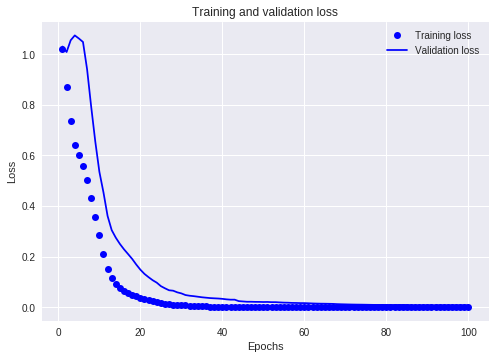

In [45]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

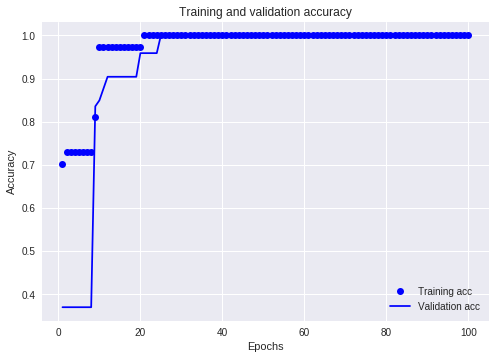

In [46]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [47]:
# Review data
  
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
  
  
x =  decode_review(train_data_raw[0])

predictions = model.predict(validation_data)
for index, data_item in enumerate(validation_data):
    print("Prediction: " + str(predictions[index]).ljust(12) , "Data: " + decode_review(data_item))

  

Prediction: [5.7816505e-06 1.9772375e-01 9.5367432e-07] Data: <CHILD CHANGE> <VALUE UP> . validationxml document browserxml arrangement entry entry <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
Prediction: [3.7550926e-06 2.0633951e-01 7.4505806e-07] Data: <STRING CHANGE> <VALUE UP> . validationxml document browserxml arrangement entry entry entry @label <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
Prediction: [5.5998564e-05 7.5042248e-05 3.7986162e-01] Data: <NUMBER CHANGE> <VALUE DOWN> . validationxml document browserxml arrangement entry entry @chronoid <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
Prediction: [6.8247318e-06 2.6177996e-01 1.2278557e-05] Data: <STRING CHANGE> <VALUE DOWN> . validationxml document browserxml arrangement entry entry @label <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
Prediction: [9.1195107e-06 2.238766